In [ ]:
#En este archivo aplico el kernel width pensado para la distancia manhattan, dimension*0.75, para ello necesitare instanciar dos explainers 
#distintos como veras en el codigo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/TFG/Distances_study/Dimensionalidad'

Mounted at /content/drive
/content/drive/My Drive/TFG/Distances_study/Dimensionalidad


In [ ]:
!pip install -q lime
!pip install -q lime-stability

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn import ensemble
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import lime.lime_tabular
from lime_stability.stability import LimeTabularExplainerOvr

seed = 4
random.seed(seed)

In [ ]:
def Explication_study(expl,instance,num_features,num_samples,distance):
  #Devuelve los datos relevantes de una explicación en LIME: R^2, CSI, VSI

  exp = expl.explain_instance(X_test[instance],classifier.predict_proba, 
                                      num_features=num_features,num_samples=num_samples,
                                      distance_metric=distance)
  
  csi,vsi = expl.check_stability(X_test[instance],classifier.predict_proba, 
                                          num_features=num_features,num_samples=num_samples,
                                          distance_metric=distance,n_calls = 10)
  return exp.score,csi,vsi


In [ ]:
def Plot_data(euclidean_data,manhattan_data,min_dim,max_dim,step_dim):
  l = len(euclidean_data)
  dimensiones = np.arange(min_dim,max_dim,step_dim)
  eu_R = np.zeros(l)
  eu_CSI = np.zeros(l)
  eu_VSI = np.zeros(l)
  man_R = np.zeros(l)
  man_CSI = np.zeros(l)
  man_VSI = np.zeros(l)
  for i in range(l):
    eu_R[i] = Eu_data[i][0]
    eu_CSI[i] = Eu_data[i][1]
    eu_VSI[i] = Eu_data[i][2]
    man_R[i] = Man_data[i][0]
    man_CSI[i] = Man_data[i][1]
    man_VSI[i] = Man_data[i][2]


  #Graficamos 
  fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey = False)
  fig.tight_layout(pad=5.0) #espaciar las graficas

  ax[0].plot(dimensiones, eu_R, color='r', label='euclidean')
  ax[0].plot(dimensiones, man_R, color='g', label='manhattan')
  ax[0].set_title('R^2: Euclidean vs Manhattan')
  ax[0].legend()

  ax[1].plot(dimensiones, eu_CSI, color='r', label='euclidean')
  ax[1].plot(dimensiones, man_CSI, color='g', label='manhattan')
  ax[1].set_title('CSI: Euclidean vs Manhattan')
  ax[1].legend()

  plt.show()


2
4
6
8
10
12
14
16
18


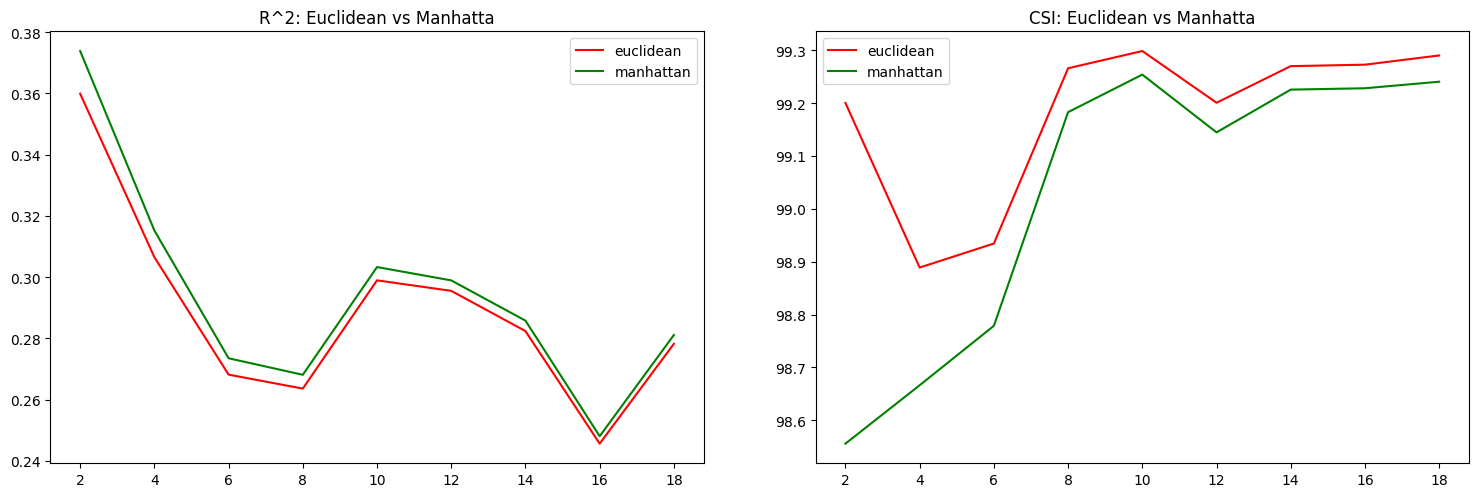

In [ ]:
#Procedemos con el estudio 
min_dimension=2
max_dimension=20
step=2
Eu_data = []
Man_data = []

for d in range(min_dimension,max_dimension,step): #Cuantos atributos va a haber en el dataset
  X, y = make_classification(n_samples=500, n_features=d, n_informative = d, n_redundant = 0, n_classes=2, n_clusters_per_class=1, random_state=seed)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=seed)
  n=X_test.shape[0]
  classifier = ensemble.RandomForestClassifier()
  classifier.fit(X_train, y_train);
  #Instanciamos los dos explainers
  explainer_eu = LimeTabularExplainerOvr(X_train, verbose = False, discretize_continuous=True, random_state = seed) #Default kernel 
  explainer_man = LimeTabularExplainerOvr(X_train, kernel_width= d*0.75, verbose = False, discretize_continuous=True, random_state = seed) #Custom kernel
  #Euclidean calculations
  R_array = np.zeros(n) 
  CSI_array = np.zeros(n)
  VSI_array = np.zeros(n)
  for i in range(n):
    r,csi,vsi = Explication_study(explainer_eu,i,d,4000,"euclidean")
    R_array[i]=r
    CSI_array[i]=csi
    VSI_array[i]=vsi
  Eu_data.append((np.mean(R_array),np.mean(CSI_array),np.mean(VSI_array)))
  #Manhattan calculations
  R_array = np.zeros(n) 
  CSI_array = np.zeros(n)
  VSI_array = np.zeros(n)
  for i in range(n):
    r,csi,vsi = Explication_study(explainer_man,i,d,4000,"manhattan")
    R_array[i]=r
    CSI_array[i]=csi
    VSI_array[i]=vsi
  Man_data.append((np.mean(R_array),np.mean(CSI_array),np.mean(VSI_array)))
  print(d)

Plot_data(Eu_data,Man_data,min_dimension,max_dimension,step)

In [ ]:

#Lo que vemos es que la discrepancia entra ambas distancias desaparece, y que se obtienen comportamientos parecidos para ambas.
#Debido a la perdida de informacion de la que hablabamos anteriormente
#Sería interesante ver si dan las mismas expliaciones (future work)

2
4
6
8
10
12
14
16
18


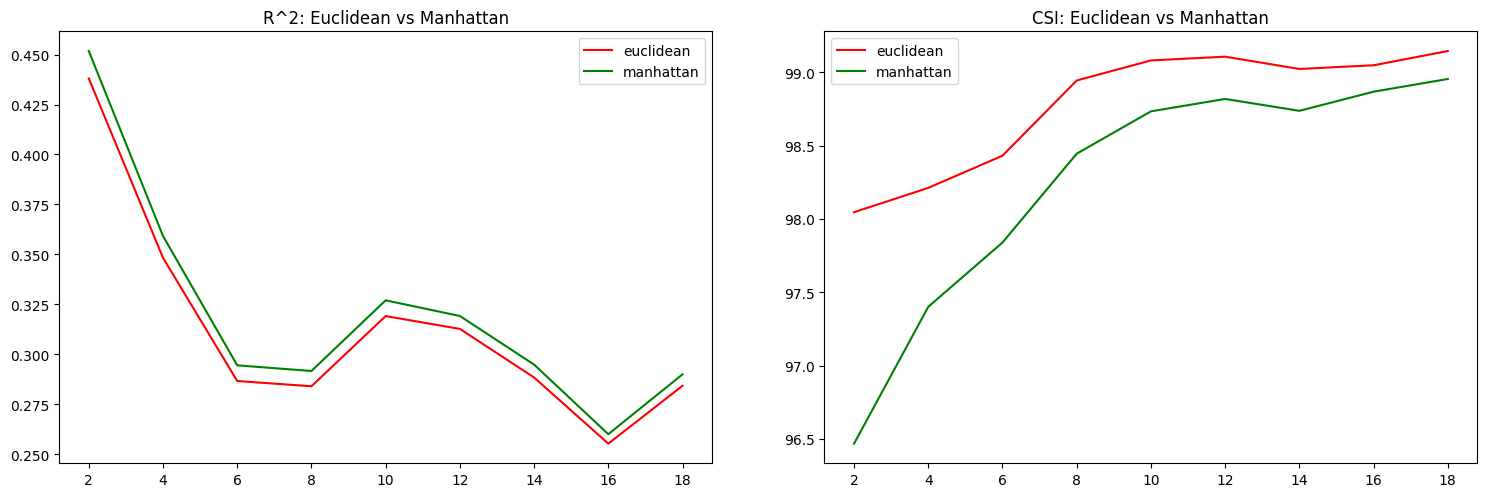

In [ ]:
#Disminuimos el kernel tanto en el default como en el custom, ya que vemos uqe la estabilidad es buena 
min_dimension=2
max_dimension=20
step=2
Eu_data = []
Man_data = []

for d in range(min_dimension,max_dimension,step): #Cuantos atributos va a haber en el dataset
  X, y = make_classification(n_samples=500, n_features=d, n_informative = d, n_redundant = 0, n_classes=2, n_clusters_per_class=1, random_state=seed)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=seed)
  n=X_test.shape[0]
  classifier = ensemble.RandomForestClassifier()
  classifier.fit(X_train, y_train);
  explainer_eu = LimeTabularExplainerOvr(X_train, kernel_width = np.sqrt(d)*0.5, verbose = False, discretize_continuous=True, random_state = seed)#0.5 
  explainer_man = LimeTabularExplainerOvr(X_train, kernel_width= d*0.5, verbose = False, discretize_continuous=True, random_state = seed)#0.5
  #Euclidean calculations
  R_array = np.zeros(n) 
  CSI_array = np.zeros(n)
  VSI_array = np.zeros(n)
  for i in range(n):
    r,csi,vsi = Explication_study(explainer_eu,i,d,4000,"euclidean")
    R_array[i]=r
    CSI_array[i]=csi
    VSI_array[i]=vsi
  Eu_data.append((np.mean(R_array),np.mean(CSI_array),np.mean(VSI_array)))
  #Manhattan calculations
  R_array = np.zeros(n) 
  CSI_array = np.zeros(n)
  VSI_array = np.zeros(n)
  for i in range(n):
    r,csi,vsi = Explication_study(explainer_man,i,d,4000,"manhattan")
    R_array[i]=r
    CSI_array[i]=csi
    VSI_array[i]=vsi
  Man_data.append((np.mean(R_array),np.mean(CSI_array),np.mean(VSI_array)))
  print(d)

Plot_data(Eu_data,Man_data,min_dimension,max_dimension,step)

2
4
6
8
10
12
14
16
18


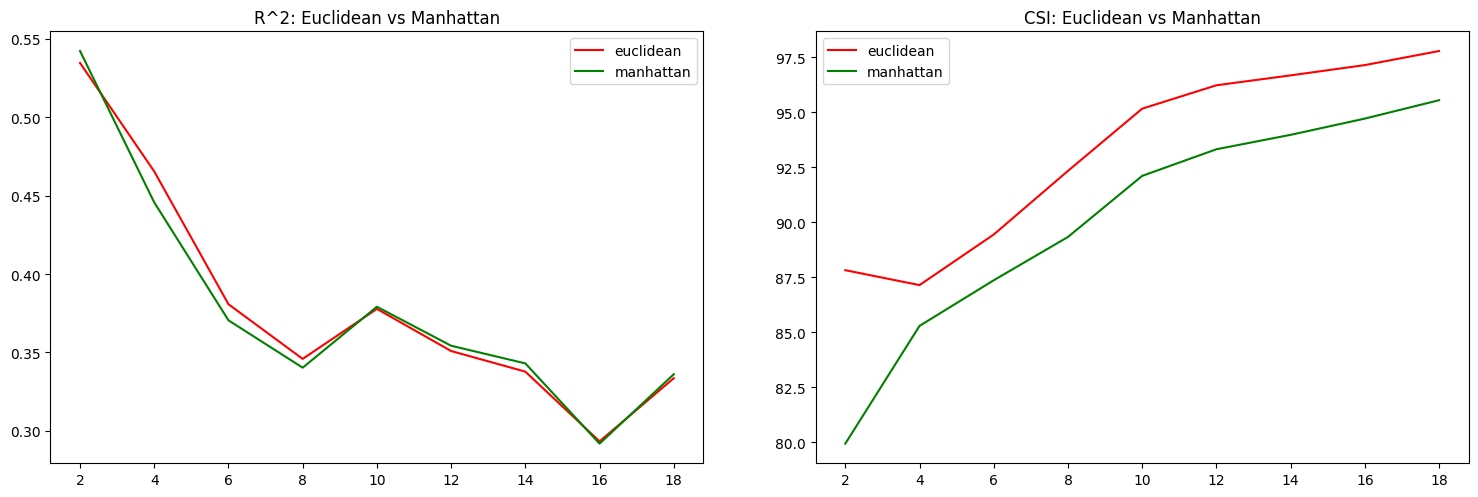

In [ ]:
#Disminuimos el kernel tanto en el default como en el custom, ya que vemos uqe la estabilidad es buena 
min_dimension=2
max_dimension=20
step=2
Eu_data = []
Man_data = []

for d in range(min_dimension,max_dimension,step): #Cuantos atributos va a haber en el dataset
  X, y = make_classification(n_samples=500, n_features=d, n_informative = d, n_redundant = 0, n_classes=2, n_clusters_per_class=1, random_state=seed)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=seed)
  n=X_test.shape[0]
  classifier = ensemble.RandomForestClassifier()
  classifier.fit(X_train, y_train);
  explainer_eu = LimeTabularExplainerOvr(X_train, kernel_width = np.sqrt(d)*0.3, verbose = False, discretize_continuous=True, random_state = seed)#0.3
  explainer_man = LimeTabularExplainerOvr(X_train, kernel_width= d*0.3, verbose = False, discretize_continuous=True, random_state = seed)#0.3
  #Euclidean calculations
  R_array = np.zeros(n) 
  CSI_array = np.zeros(n)
  VSI_array = np.zeros(n)
  for i in range(n):
    r,csi,vsi = Explication_study(explainer_eu,i,d,4000,"euclidean")
    R_array[i]=r
    CSI_array[i]=csi
    VSI_array[i]=vsi
  Eu_data.append((np.mean(R_array),np.mean(CSI_array),np.mean(VSI_array)))
  #Manhattan calculations
  R_array = np.zeros(n) 
  CSI_array = np.zeros(n)
  VSI_array = np.zeros(n)
  for i in range(n):
    r,csi,vsi = Explication_study(explainer_man,i,d,4000,"manhattan")
    R_array[i]=r
    CSI_array[i]=csi
    VSI_array[i]=vsi
  Man_data.append((np.mean(R_array),np.mean(CSI_array),np.mean(VSI_array)))
  print(d)

Plot_data(Eu_data,Man_data,min_dimension,max_dimension,step)

In [ ]:
#Por los resultados de estabilidad todavia seria posible disminuir un poco mas el kernel width para obtener mejores R^2 si queremos